# Spacy:
- Spacy is free, open-source library for advanced NLP in Python.
- made for :
    - production use
    - information extraction
    - Natural language understanding systems
    - pre-process text for deep learning

## - Spacy's Statistical Models
## - Spacy's Processing Pipeline


## Features of Spacy:
| Name                          | Description                                                                                     |
|-------------------------------|-------------------------------------------------------------------------------------------------|
| Tokenization                  | Segmenting text into words, punctuations marks etc.                                              |
| Part-of-speech (POS) Tagging | Assigning word types to tokens, like verb or noun.                                               |
| Dependency Parsing            | Assigning syntactic dependency labels, describing the relations between individual tokens.      |
| Lemmatization                 | Assigning the base forms of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is “rat”. |
| Sentence Boundary Detection   | Finding and segmenting individual sentences.                                                      |
| Named Entity Recognition (NER)| Labelling named “real-world” objects, like persons, companies or locations.                      |
| Entity Linking (EL)          | Disambiguating textual entities to unique identifiers in a knowledge base.                       |
| Similarity                    | Comparing words, text spans and documents and how similar they are to each other.                 |
| Text Classification          | Assigning categories or labels to a whole document, or parts of a document.                        |
| Rule-based Matching          | Finding sequences of tokens based on their texts and linguistic annotations, similar to regular expressions. |
| Training                      | Updating and improving a statistical model’s predictions.                                         |
| Serialization                | Saving objects to files or byte strings.                                                          |


### Statistical Models in Spacy:
- en_core_web_sm
- en_core_web_md
- en_core_web_lg

It need to be load by using ```spacy.load()```
- It returns a Language callable object, commonly called nlp.

In [6]:
# Firstly, download the models as required:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 12.8/12.8 MB 6.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
!pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
nlp

Or, we can directly import form the ```spacy.lang```

In [23]:
# Import the english language class
from spacy.lang.en import English

#create the nlp object
nlp = English()

### Doc Object
- You can instantiate a Doc object by calling the Language object with the input string as an argument:
- For instance, you iterated over the Doc object with a list comprehension that produces a series of Token objects.
### Token Object:
- for example word or a punctuation character
- To get a token at specific position, you can index into the doc.
- Token objects also provide various attributes that let you access more information about the tokens.
    - On each Token object, you called the .text attribute to get the text contained within that token.

In [24]:
introduction_doc = nlp("This tutorial is about Natural Language Processing in spaCy.")
type(introduction_doc)

spacy.tokens.doc.Doc

In [14]:
[token.text for token in introduction_doc]

['This',
 'tutorial',
 'is',
 'about',
 'Natural',
 'Language',
 'Processing',
 'in',
 'spaCy',
 '.']

In [27]:
# Index into Doc to get specific token:
token1 =introduction_doc[0]
token1

This

### Span Object:
- A span object is a slice of the document consisting of one or more tokens.
- It's only a view of the Doc and doesn't contain any data itself.
- To create a span, you can use python's slice notation.
- For example:
    - 1:3 will create a slice starting from the token at position 1, up to – but not including! – the token at position 3.


In [30]:
doc = nlp("How are you doing?")

# A slice from the doc object is a span object
span = doc[1:3]

# to get span text, use .text attribute
print(span.text)

are you


### Lexical Attributes

Some available token attributes:

- ```i``` is the index of the token within the parent document.
- ```text``` return the token text
- ```is_alpha``` return boolean values indicating whether the token consists of alphabetic character
    - example: the word "ten"
- ```is_punct``` return boolean whether token is punctuation
    - example: "one, zero"
- ```like_num``` returns boolean if it is like number
    - example: a token "10"
    
These attributes are also called lexical attributes: they refer to the entry in the vocabulary and don't depend on the token's context.

In [33]:
# Create doc object:
doc = nlp("Hello sir, here is you coffee! It costs $10")

# lexical attributes: i, text
print("Indexes = ",[token.i for token in doc])
print("Text = ", [token.text for token in doc])

# lexical attributes: is_alpha, is_punct, like_num
print("is_alpha = ", [token.is_alpha for token in doc])
print("is_punct = ", [token.is_punct for token in doc])
print("like_num = ", [token.like_num for token in doc])

Indexes =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Text =  ['Hello', 'sir', ',', 'here', 'is', 'you', 'coffee', '!', 'It', 'costs', '$', '10']
is_alpha =  [True, True, False, True, True, True, True, False, True, True, False, False]
is_punct =  [False, False, True, False, False, False, False, True, False, False, False, False]
like_num =  [False, False, False, False, False, False, False, False, False, False, False, True]


In [34]:
# Example of lexical attribute: Give the numbers infront of percentage:

# creating the doc object:
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

for token in doc:
    if token.like_num:
        next_token = doc[token.i + 1]

        if next_token.text == "%":
            print("Percentage found :", token)

Percentage found : 60
Percentage found : 4


#### Doc Object by reading the file.


In [18]:
import pathlib
file_name = "../test.txt"
introduction_doc = nlp(pathlib.Path(file_name).read_text(encoding="utf-8"))
print ([token.text for token in introduction_doc])

['Hello', ',', 'this', 'is', 'just', 'the', 'dummy', 'text', 'file', 'to', 'test', 'the', 'document', 'object', 'of', 'the', 'Spacy', 'library', '.']


## Sentence Detection:
- locate where sentence start and end in a given text
- divides text into linguistically meaningful units
- useful for "POS tagging" and "Named-Entity Recognition"
- ```.sents``` property is used to extract sentence from doc object

In [20]:
about_text = (
    "Gus Proto is a Python developer currently"
    " working for a London-based Fintech"
    " company. He is interested in learning"
    " Natural Language Processing."
)

#create a doc object:
about_doc = nlp(about_text)

# use .sents property to get the sentence from the document
sentences = list(about_doc.sents)
print(sentences)

[Gus Proto is a Python developer currently working for a London-based Fintech company., He is interested in learning Natural Language Processing.]


In [22]:
#Iterate over each sentence
for sentence in sentences:
    print(f"{sentence[:5]}...")

Gus Proto is a Python...
He is interested in learning...


## Statistical Models

- Some of the most interesting things you can analyze are content-specific:
    - for example, whether a word is a verb or whether a span of text is a person name.
- Statistical models enable spaCy to predict linguistic attributes in context. This usually includes,
    - Part-of-speech tags
    - Syntatic dependencies
    - Named entities.
- Models are trained on large datasets of labeled example texts.
- They can be updated with more examples to fine tune their predicions. for example, to perform better on your specific data.

Model Packages

- spaCy provides a number of pre-trained model packages you can download using the spacy download command.
- For example,
    - the en_core_web_sm package is a small English model that supports all core capabilities and is trained on web text.
- what's not included in the model packages?
    - The labelled data that the model was trained on.
    - Once they’re trained, they use binary weights to make predictions. That’s why it’s not necessary to ship them with their training data.

In [2]:
!python -m spacy download en_core_web_sm

     --------------------------------------- 12.8/12.8 MB 26.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Now loading using ```spacy.load()```

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")

- The package provides the binary weights that enable spaCy to make predictions.
- It also includes the **vocabulary**, and **meta information** to tell spaCy which language class to use and how to configure the processing pipeline.

### Spacy can parse and tag a given doc.

### Predicting Part-of-speech Tags

- Let's take a look at the model's predictions. In this example, we're using spaCy to predict **part-of-speech tags**, the word types in context.
- First, we load the small English model and receive an nlp object.
- Next, we're processing the text "She ate the pizza".
- For each token in the doc, we can print the text and the ```.pos_``` attribute, the predicted part-of-speech tag.

In [8]:
import spacy

# Load the english core web small model and create nlp object:
nlp = spacy.load("en_core_web_sm")

# Create document object:
doc = nlp("I was hangging on the tree for the whole day.")

# Iterate over the tokens and get text and the pos tags:
for token in doc:
    print(f"Token : {token.text} => {token.pos_}")

Token : I => PRON
Token : was => AUX
Token : hangging => VERB
Token : on => ADP
Token : the => DET
Token : tree => NOUN
Token : for => ADP
Token : the => DET
Token : whole => ADJ
Token : day => NOUN
Token : . => PUNCT


### Predicting Syntatic Dependencies

- In addition to part-of-speech tags, we can also predict how the words are related.
- Example,
    - whether a word is the subject of the sentence or an object.
- The ```.dep_``` attribute returns the predicted dependency label.
- The ```.head``` attribute returns the syntatic head token. You can also think of it as the parent token this word is attached to.

In [10]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head) # or token.head.text

I PRON nsubj hangging
was AUX aux hangging
hangging VERB ROOT hangging
on ADP prep hangging
the DET det tree
tree NOUN pobj on
for ADP prep hangging
the DET det day
whole ADJ amod day
day NOUN pobj for
. PUNCT punct hangging


In [11]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP dobj X.X. False False
startup startup NOUN NN dep xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False



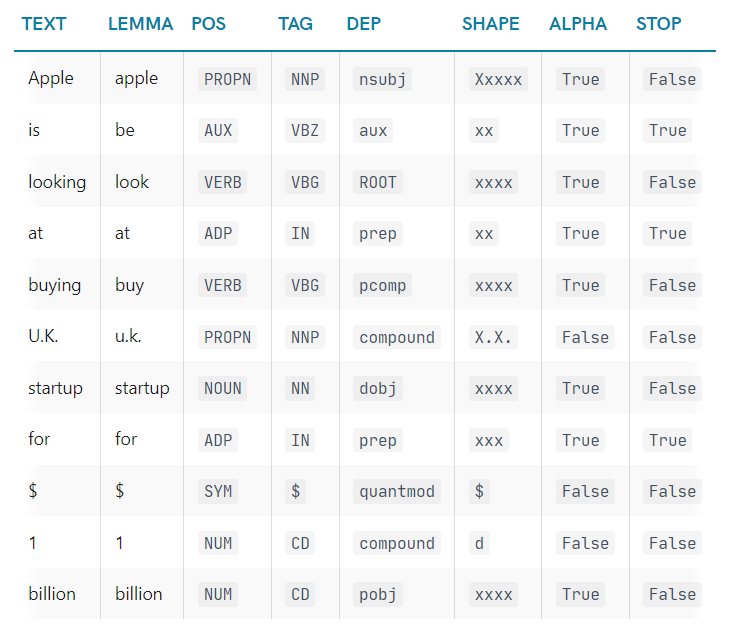
- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple UPOS part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalization, punctuation, digits.
- is alpha: Is the token an alpha character?
- is stop: Is the token part of a stop list, i.e. the most common words of the language?

Use ```spacy.explain()``` to get explaination of any tags and labels.
Use ```spacy.displacy`` to see visalization

In [15]:
# To understand VBZ tag:
spacy.explain("VBZ")

'verb, 3rd person singular present'

In [20]:
from spacy import displacy

displacy.serve(doc, style = "dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [21]:
# process text
doc = nlp("She ate the pizza")

#predicting syntactic Dependencies
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

She PRON nsubj ate
ate VERB ROOT ate
the DET det pizza
pizza NOUN dobj ate


#### Dependency Label scheme
- To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:
    - The pronoun She is a nominal subject attached to the verb – in this case, to ate.
    - The noun pizza is a direct object attached to the verb ate. It is eaten by the subject, she.
    - The determiner the, also known as an article, is attached to the noun pizza.

In [22]:
displacy.serve(doc, style = "dep")


Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### Predicting Named Entities

- Named entities are real world objects that are assigned a name- for example, a person, an organization or a country.
- The `doc.ents` property lets you access the named entities predicted by the model.
- `doc.ents` returns an iterator of Span objects, so we can print the "entity text" and the "entity label" using the `.text` and `.label_` attribute.

To visualize: 
`displacy.serve(doc, style="ent")`

In [23]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_ )

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


In this case model is correctly predicting, Apple as an Organization (ORG), U.K. as a geopolitical entity (GPE), and $1 billion as money

- Text: The original entity text.
- Start: Index of start of entity in the Doc.
- End: Index of end of entity in the Doc.
- Label: Entity label, i.e. type.

In [24]:
displacy.serve(doc, style = "ent")

c:\Users\Dell\anaconda3\envs\myenvbb\lib\site-packages\spacy\displacy\__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'ent' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


### SpaCy Explain method

- A quick tip: To get definitions for the most common tags and labels, you can use the `spacy.explain` helper function.
- For example,
    - "GPE" for geopolitical entity isn't exactly intuitive – but spacy.explain can tell you that it refers to countries, cities and states.
    - The same work for part-of-speech tags and dependency labels.

In [30]:
# spacy explain methods for tags and labels:

# GPE explain:
print("Named Entity, GPE means : ", spacy.explain("GPE"))

# part of speech explain:
print("POS explain, NNP means: ", spacy.explain("NNP"))

# Dependency Labe; explain:
print("Dependency label explain, dobj means: ", spacy.explain("dobj"))
print("Dependency label explain, nsubj means: ", spacy.explain("nsubj"))

Named Entity, GPE means :  Countries, cities, states
POS explain, NNP means:  noun, proper singular
Dependency label explain, dobj means:  direct object
Dependency label explain, nsubj means:  nominal subject


### Rule-based matching
- Compared to regular expressions, the *matcher* works with Doc and Token objects instead of only strings.
- It's also more flexible: you can search for texts but also other lexical attributes.
- You can even write rules that use the model's predictions.
- Example:
    - Find the word duck only if it's verb, not a noun.
    - duck(verb) vs. duck(noun)

**match patterns**
- Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values.